In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Image processing
import glob
import cv2

# Filters
import pywt
from scipy.signal import wiener
try:
    from skimage.restoration import denoise_tv_chambolle
except ImportError:
    # skimage < 0.12
    from skimage.filters import denoise_tv_chambolle
from image_filters import anisodiff, notch_filter
from skimage.filters import difference_of_gaussians
from bm3d import bm3d_rgb

from noise_evaluation_functions import *

In [7]:
# Load the ground truth and reconstructed images
gt_folder = '../running_outputs/lego_orig_all/*.png'
reconst_folder = '../running_outputs/KiloNeRF_16epochs_400/*.png'
gt_images = [file for file in glob.glob(gt_folder)]
reconst_images = [file for file in glob.glob(reconst_folder)]

# Put them as pairs
img_pairs = get_imgPairs(reconst_images, gt_images)

### Evaluating The Outputs from DL Models

In [21]:
# Load the ground truth and reconstructed images
gt_folder = '../running_outputs/lego_orig_all/*.png'
reconst_folder = '../running_outputs/KiloNeRF_16epochs_400/*.png'
denoised_folder = '../running_outputs/vdnet/*.png'
# denoised_folder = '../running_outputs/mprnet-denoising/*.png'
gt_images = [file for file in glob.glob(gt_folder)]
reconst_images = [file for file in glob.glob(reconst_folder)]
denoised_images = [file for file in glob.glob(denoised_folder)]

# Put them as pairs
img_pairs = get_imgTriples(reconst_images, gt_images, denoised_images)

In [22]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []

while img_id != len(img_pairs):
    reconstructed, ground_truth, denoised = img_pairs[img_id]
    ground_truth, reconstructed, denoised = read_images(ground_truth, reconstructed, denoised)
    
    psnr_diff, ssim_diff, lpips_diff = get_metrics_diff(ground_truth, reconstructed, denoised, '')
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    lpips_diffs.append(lpips_diff)
    
    img_id += 1

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [

In [5]:
# metrics_diff = pd.read_csv('DL_metricsDiff.csv').to_dict()

In [24]:
# metrics_diffs = {}
diffs = {
    0: np.mean(psnr_diffs), 1: np.std(psnr_diffs), 
    2: np.mean(ssim_diffs), 3: np.std(ssim_diffs),
    4: np.mean(lpips_diffs), 5: np.std(lpips_diffs)}

# metrics_diff['mprnet_deblurring'] = diffs
# metrics_diff['mprnet_denoising'] = diffs
metrics_diff['vdnet'] = diffs

In [28]:
df = pd.DataFrame(metrics_diff)
df.to_csv('DL_metricsDiff.csv')

# Gaussian Blur

In [9]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []

while img_id != len(img_pairs):
    reconstructed, ground_truth = img_pairs[img_id]
    ground_truth, reconstructed = read_images(ground_truth, reconstructed)
    
    gaussian_blur = cv2.GaussianBlur(reconstructed, (5, 5), 0)

    psnr_diff, ssim_diff, lpips_diff = get_metrics_diff(ground_truth, reconstructed, gaussian_blur, 'Gaussian Blur')
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    lpips_diffs.append(lpips_diff)
    
    img_id += 1

Gaussian Blur
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Gaussian Blur
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Gaussian Blur
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Gaussian Blur
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Gaussian Blur
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Gaussian Bl

In [14]:
metrics_diffs = {}
gaussian_diffs = {
    'psnr_mean': np.mean(psnr_diffs), 'psnr_std': np.std(psnr_diffs), 
    'ssim_mean': np.mean(ssim_diffs), 'ssim_std': np.std(ssim_diffs),
    'lpips_mean': np.mean(lpips_diffs), 'lpips_std': np.std(lpips_diffs)}

metrics_diffs['gaussian_blur'] = gaussian_diffs

In [20]:
df = pd.DataFrame(metrics_diffs)
df.to_csv('metrics_diffs.csv')

In [18]:
df = pd.read_csv('metrics_diffs.csv')

In [22]:
df = df.rename(columns={"Unnamed: 0": "metrics"})

# Median Filter

In [10]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []

while img_id != len(img_pairs):
    reconstructed, ground_truth = img_pairs[img_id]
    ground_truth, reconstructed = read_images(ground_truth, reconstructed)
    
    median_filtered = cv2.medianBlur(reconstructed, 5)

    psnr_diff, ssim_diff, lpips_diff = get_metrics_diff(ground_truth, reconstructed, median_filtered, 'Gaussian Blur')
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    lpips_diffs.append(lpips_diff)
    
    img_id += 1

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [

In [25]:
gaussian_diffs = {
    2: np.mean(psnr_diffs), 3: np.std(psnr_diffs), 
    4: np.mean(ssim_diffs), 5: np.std(ssim_diffs),
    0: np.mean(lpips_diffs), 1: np.std(lpips_diffs)}

metrics_diffs['median_filter'] = gaussian_diffs
df.to_csv('metrics_diffs.csv')

# Bilateral Filter

In [28]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []

while img_id != len(img_pairs):
    reconstructed, ground_truth = img_pairs[img_id]
    ground_truth, reconstructed = read_images(ground_truth, reconstructed)
    
    bilateral_filter = cv2.bilateralFilter(reconstructed, 9, 75, 75)

    psnr_diff, ssim_diff, lpips_diff = get_metrics_diff(ground_truth, reconstructed, median_filtered, 'Gaussian Blur')
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    lpips_diffs.append(lpips_diff)
    
    img_id += 1

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [

In [30]:
gaussian_diffs = {
    2: np.mean(psnr_diffs), 3: np.std(psnr_diffs), 
    4: np.mean(ssim_diffs), 5: np.std(ssim_diffs),
    0: np.mean(lpips_diffs), 1: np.std(lpips_diffs)}

metrics_diffs['bilateral_filter'] = gaussian_diffs
df.to_csv('metrics_diffs.csv')

# Non-local Means Denoising

In [28]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []
img_pairs1 = [i for i in img_pairs if '/92' in i[0]]
while img_id != len(img_pairs1):
    reconstructed, ground_truth = img_pairs1[img_id]
    ground_truth, reconstructed,_ = read_images(ground_truth, reconstructed)
    
    non_local_means = cv2.fastNlMeansDenoisingColored(reconstructed,None, 10, 10, 7, 21)

    psnr_diff, ssim_diff, lpips_diff = get_metrics_diff(ground_truth, reconstructed, non_local_means, '')
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    lpips_diffs.append(lpips_diff)
    
    img_id += 1

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


In [29]:
plt.imsave('test.png', non_local_means)

In [52]:
metrics_diffs

{'Unnamed: 0': {0: 'lpips_mean',
  1: 'lpips_std',
  2: 'psnr_mean',
  3: 'psnr_std',
  4: 'ssim_mean',
  5: 'ssim_std'},
 'gaussian_blur': {0: -221.424645,
  1: 71.22734497156956,
  2: -4.503115,
  3: 2.2150571125311878,
  4: -2.84147,
  5: 1.0296869908375068},
 'median_filter': {2: -5.852715,
  3: 2.911168537507748,
  4: -4.673414999999999,
  5: 1.957168861589362,
  0: -145.469325,
  1: 53.23022460819956},
 'bilateral_filter': {2: -60.22204000000001,
  3: 6.765156944846143,
  4: -31.136725,
  5: 5.275701971242785,
  0: -734.422685,
  1: 242.80210673716525},
 'non_local_means': {2: -3.30201,
  3: 1.625535979269607,
  4: -2.7569600000000003,
  5: 1.6682572398763926,
  0: -120.07709000000001,
  1: 51.74000224460664},
 'wavelete_transform': {2: -5.777282051282051,
  3: 2.3543494822454964,
  4: -2.7629230769230766,
  5: 0.7749797477789053,
  0: -89.7853076923077,
  1: 37.13334377007208},
 'wiener': {2: -3.0283399999999996,
  3: 1.719627024793458,
  4: 5.995335,
  5: 5.778937926018499,
  0

In [34]:
gaussian_diffs = {
    2: np.mean(psnr_diffs), 3: np.std(psnr_diffs), 
    4: np.mean(ssim_diffs), 5: np.std(ssim_diffs),
    0: np.mean(lpips_diffs), 1: np.std(lpips_diffs)}

metrics_diffs['non_local_means'] = gaussian_diffs
df.to_csv('metrics_diffs.csv')

# Wavenet Transformation

In [36]:
def wavelet_denoising_color(image):
    # Function to pad an image to the next power of two
    def pad_to_power_of_two(img):
        rows, cols = img.shape[:2]
        nrows, ncols = 2**np.ceil(np.log2(rows)), 2**np.ceil(np.log2(cols))
        return cv2.copyMakeBorder(img, 0, int(nrows-rows), 0, int(ncols-cols), cv2.BORDER_REFLECT)

    # Function to crop the image back to original size
    def crop_to_original_size(img, original):
        rows, cols = original.shape[:2]
        return img[:rows, :cols]

    original_size = image.shape[:2]
    padded_image = pad_to_power_of_two(image)
    channels = cv2.split(padded_image)
    denoised_channels = []

    for channel in channels:
        coeffs = pywt.wavedec2(channel, 'db1', level=1)
        cA, (cH, cV, cD) = coeffs

        cH = pywt.threshold(cH, value=0.5 * np.max(cH), mode='soft')
        cV = pywt.threshold(cV, value=0.5 * np.max(cV), mode='soft')
        cD = pywt.threshold(cD, value=0.5 * np.max(cD), mode='soft')

        denoised_channel = pywt.waverec2((cA, (cH, cV, cD)), 'db1')
        denoised_channels.append(denoised_channel)

    denoised_image = cv2.merge(denoised_channels)
    denoised_image = crop_to_original_size(denoised_image, image)

    return denoised_image

In [40]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []

while img_id != len(img_pairs):
    reconstructed, ground_truth = img_pairs[img_id]
    ground_truth, reconstructed = read_images(ground_truth, reconstructed)
    
    wavelet_denoised = wavelet_denoising_color(reconstructed)
    wavelet_denoised = wavelet_denoised.astype(np.uint8)

    psnr_diff, ssim_diff, lpips_diff = get_metrics_diff(ground_truth, reconstructed, wavelet_denoised, '')
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    lpips_diffs.append(lpips_diff)
    
    img_id += 1

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/sayyor/.local/share/virtualenvs/BDRP-anF7eHmv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [

In [38]:
gaussian_diffs = {
    2: np.mean(psnr_diffs), 3: np.std(psnr_diffs), 
    4: np.mean(ssim_diffs), 5: np.std(ssim_diffs),
    0: np.mean(lpips_diffs), 1: np.std(lpips_diffs)}

metrics_diffs['wavelete_transform'] = gaussian_diffs
df.to_csv('metrics_diffs.csv')

In [41]:
metrics_diffs

{'Unnamed: 0': {0: 'lpips_mean',
  1: 'lpips_std',
  2: 'psnr_mean',
  3: 'psnr_std',
  4: 'ssim_mean',
  5: 'ssim_std'},
 'gaussian_blur': {0: -221.424645,
  1: 71.22734497156956,
  2: -4.503115,
  3: 2.2150571125311878,
  4: -2.84147,
  5: 1.0296869908375068},
 'median_filter': {2: -5.852715,
  3: 2.911168537507748,
  4: -4.673414999999999,
  5: 1.957168861589362,
  0: -145.469325,
  1: 53.23022460819956},
 'bilateral_filter': {2: -60.22204000000001,
  3: 6.765156944846143,
  4: -31.136725,
  5: 5.275701971242785,
  0: -734.422685,
  1: 242.80210673716525},
 'non_local_means': {2: -3.30201,
  3: 1.625535979269607,
  4: -2.7569600000000003,
  5: 1.6682572398763926,
  0: -120.07709000000001,
  1: 51.74000224460664},
 'wavelete_transform': {2: -5.777282051282051,
  3: 2.3543494822454964,
  4: -2.7629230769230766,
  5: 0.7749797477789053,
  0: -89.7853076923077,
  1: 37.13334377007208}}

# Wiener

In [48]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []

while img_id != len(img_pairs):
    reconstructed, ground_truth = img_pairs[img_id]
    ground_truth, reconstructed = read_images(ground_truth, reconstructed)
    
    reconstructed_gray = rgb2gray(reconstructed)
    wiener_filter = wiener(reconstructed_gray, (5,5))
    ground_truth_gray = rgb2gray(ground_truth)

    psnr_diff, ssim_diff = get_metrics_diff(ground_truth_gray, reconstructed_gray, wiener_filter, '', use_lpips=False)
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    lpips_diffs.append(lpips_diff)
    
    img_id += 1

In [49]:
gaussian_diffs = {
    2: np.mean(psnr_diffs), 3: np.std(psnr_diffs), 
    4: np.mean(ssim_diffs), 5: np.std(ssim_diffs),
    0: np.mean(lpips_diffs), 1: np.std(lpips_diffs)}

metrics_diffs['wiener'] = gaussian_diffs
df.to_csv('metrics_diffs.csv')

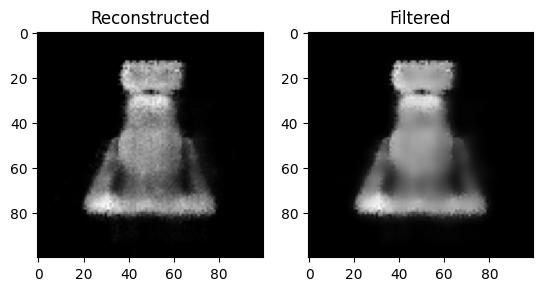

In [130]:
plot_images(reconstructed_gray, wiener_filter, gray=True)

# Anisotropic Diffusion

In [54]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []

while img_id != len(img_pairs):
    reconstructed, ground_truth = img_pairs[img_id]
    ground_truth, reconstructed = read_images(ground_truth, reconstructed)
    
    reconstructed_gray = rgb2gray(reconstructed)
    anisodiff_filtered = anisodiff(reconstructed_gray)
    anisodiff_filtered = np.float64(anisodiff_filtered)
    ground_truth_gray = rgb2gray(ground_truth)

    psnr_diff, ssim_diff = get_metrics_diff(ground_truth_gray, reconstructed_gray, anisodiff_filtered, '', use_lpips=False)
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    lpips_diffs.append(lpips_diff)
    
    img_id += 1

In [56]:
gaussian_diffs = {
    2: np.mean(psnr_diffs), 3: np.std(psnr_diffs), 
    4: np.mean(ssim_diffs), 5: np.std(ssim_diffs),
    0: np.mean(lpips_diffs), 1: np.std(lpips_diffs)}

metrics_diffs['anisotropic_diffusion'] = gaussian_diffs
df.to_csv('metrics_diffs.csv')

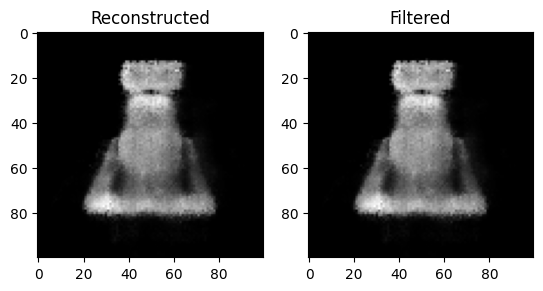

In [133]:
plot_images(reconstructed_gray,anisodiff_filtered,gray=True)

# Total Variation Denoising

In [25]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []
img_pairs1 = [i for i in img_pairs if '/92' in i[0]]
while img_id != len(img_pairs1):
    reconstructed, ground_truth = img_pairs1[img_id]
    ground_truth, reconstructed,_ = read_images(ground_truth, reconstructed)
    
    reconstructed_gray = rgb2gray(reconstructed)
    tv_denoised = denoise_tv_chambolle(reconstructed_gray, weight=10)
    ground_truth_gray = rgb2gray(ground_truth)

    psnr_diff, ssim_diff = get_metrics_diff(ground_truth_gray, reconstructed_gray, tv_denoised, '', use_lpips=False)
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    # lpips_diffs.append(lpips_diff)
    
    img_id += 1

In [27]:
plt.imsave('test.png', tv_denoised, cmap=plt.get_cmap('gray'))

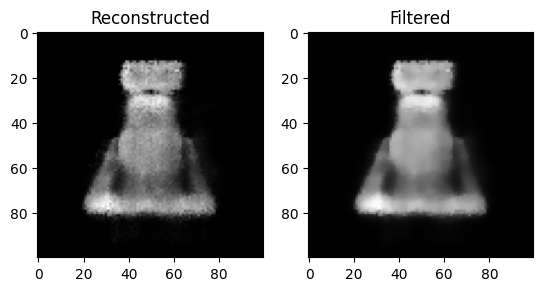

In [177]:
plot_images(reconstructed_gray,tv_denoised,gray=True)

In [58]:
gaussian_diffs = {
    2: np.mean(psnr_diffs), 3: np.std(psnr_diffs), 
    4: np.mean(ssim_diffs), 5: np.std(ssim_diffs),
    0: np.mean(lpips_diffs), 1: np.std(lpips_diffs)}

metrics_diffs['tv_denoise'] = gaussian_diffs
df.to_csv('metrics_diffs.csv')

# Notch Filter

In [60]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []

while img_id != len(img_pairs):
    reconstructed, ground_truth = img_pairs[img_id]
    ground_truth, reconstructed = read_images(ground_truth, reconstructed)
    
    reconstructed_gray = rgb2gray(reconstructed)
    notch_filtered = notch_filter(reconstructed_gray)
    ground_truth_gray = rgb2gray(ground_truth)

    psnr_diff, ssim_diff = get_metrics_diff(ground_truth_gray, reconstructed_gray, notch_filtered, '', use_lpips=False)
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    lpips_diffs.append(lpips_diff)
    
    img_id += 1

In [64]:
gaussian_diffs = {
    2: np.mean(psnr_diffs), 3: np.std(psnr_diffs), 
    4: np.mean(ssim_diffs), 5: np.std(ssim_diffs),
    0: np.mean(lpips_diffs), 1: np.std(lpips_diffs)}

metrics_diffs['notch_filtered'] = gaussian_diffs
df.to_csv('metrics_diffs.csv')

# Bandpass Filter

In [65]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
lpips_diffs = []

while img_id != len(img_pairs):
    reconstructed, ground_truth = img_pairs[img_id]
    ground_truth, reconstructed = read_images(ground_truth, reconstructed)
    
    reconstructed_gray = rgb2gray(reconstructed)
    bandpassed = difference_of_gaussians(reconstructed_gray, 1, 50)
    ground_truth_gray = rgb2gray(ground_truth)

    psnr_diff, ssim_diff = get_metrics_diff(ground_truth_gray, reconstructed_gray, bandpassed, '', use_lpips=False)
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    lpips_diffs.append(lpips_diff)
    
    img_id += 1

In [66]:
gaussian_diffs = {
    2: np.mean(psnr_diffs), 3: np.std(psnr_diffs), 
    4: np.mean(ssim_diffs), 5: np.std(ssim_diffs),
    0: np.mean(lpips_diffs), 1: np.std(lpips_diffs)}

metrics_diffs['bandpassed'] = gaussian_diffs
df.to_csv('metrics_diffs.csv')

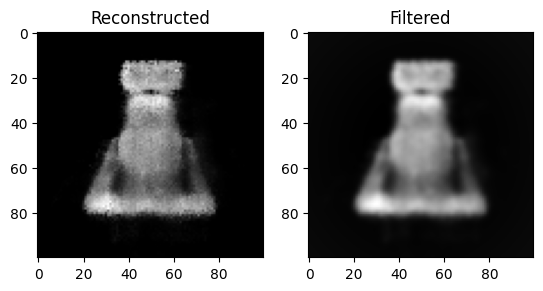

In [62]:
plot_images(reconstructed_gray, bandpassed, gray=True)

# BM3D

In [6]:
from PIL import Image

In [12]:
img_pairs1 = [i for i in img_pairs if '/92' in i[0]]

In [14]:
img_id = 0
psnr_diffs = []
ssim_diffs = []
# lpips_diffs = []

while img_id != len(img_pairs1):
    print(img_id)
    reconstructed, ground_truth = img_pairs1[img_id]
    y, y_noisy,_ = read_images(ground_truth, reconstructed)
    y = np.array(Image.open(ground_truth)) / 255
    y_noisy = np.array(Image.open(reconstructed)) / 255
    y_est = bm3d_rgb(y_noisy, sigma_psd=30/255)
    
    psnr_diff, ssim_diff = get_metrics_diff(y, y_noisy, y_est, '', use_lpips=False)
    psnr_diffs.append(psnr_diff)
    ssim_diffs.append(ssim_diff)
    # lpips_diffs.append(lpips_diff)
    
    img_id += 1

0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


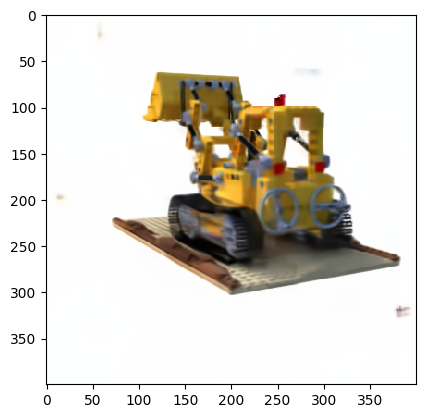

In [22]:
plt.imshow(y_est, interpolation='none')

In [20]:
new = (1/(2*2.25)) * y_est + 0.5
plt.imsave('92.png',new)

In [96]:
gaussian_diffs = {
    2: np.mean(psnr_diffs), 3: np.std(psnr_diffs), 
    4: np.mean(ssim_diffs), 5: np.std(ssim_diffs),
    0: np.nan, 1: np.nan}

metrics_diffs['bm3d'] = gaussian_diffs
df.to_csv('metrics_diffs.csv')

In [3]:
df = pd.DataFrame(metrics_diffs)
df = df.rename(columns={"Unnamed: 0":"metric"})
df.to_csv("metrics_diff.csv")

NameError: name 'metrics_diffs' is not defined

In [4]:
df = pd.read_csv("DL_metricsDiff.csv")

### Plotting the results

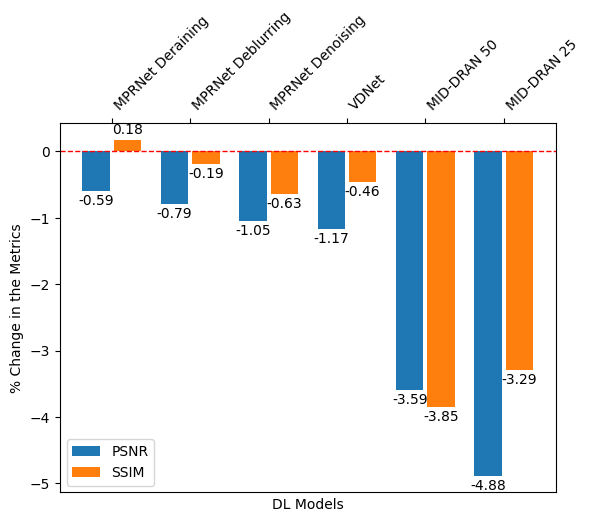

In [5]:
methods = [
    'MID-DRAN 25', 'MID-DRAN 50', 'MPRNet Deblurring', 'MPRNet Denoising', 'MPRNet Deraining', 'VDNet']
methods_cols = [
    'mid-dran-25', 'mid-dran-50', 'mprnet_deblurring',
       'mprnet_denoising', 'mprnet_deraining', 'vdnet']

# notShow_idxs=[3,4,5,6,8]

plot_metricsDiff(df, methods, methods_cols, idxs=[0,2], h_plus=0.25, xlabel='DL Models')